## Repères du notebook image_SIFT
    
   1. [Introduction: Chargement des données et observations](#introduction)
   
         [Import des images et des labels depuis text_data](#sub1)
         
         [Affichage d'exemples d'images par label](#sub2)
         
         [Détermination des descripteurs SIFT pour une image](#sub3)
         
      
   2. [Pré-traitement des images via SIFT et segmentation](#p1)
   
       [Créations des descripteurs de chaque image](#sub1-p1)
   
       [Création des clusters de descripteurs](#sub2-p1)
       
       [Création des features des images](#sub3-p1)
       
       [Réductions de dimension](#sub4-p1)
   

   3. [Analyse des résultats obtenues](#p3)
   
       [Visualisation : affichage T-SNE selon catégories d'images](#sub1-p3)
       
       [Mesures : similarité entre catégories et clusters](#sub2-p3)
       

In [48]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import dataframe_image as dfi

# 1. Introduction: Chargement des données et observations <a class="anchor" id="introduction"></a>

## Import des images et des labels depuis text_data<a class="anchor" id="sub1"></a>

In [49]:
%matplotlib inline
from os import listdir

path = "C:/Users/Adnene/Documents/Projet_6/Flipkart/Images"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [50]:
text_data = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv")
print(text_data.shape)
text_data.head()

(1050, 15)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [51]:
l_cat = []
for i in range(len(text_data)):
    cat = text_data['product_category_tree'][i].split('>>')[0][2:]
    l_cat.append(cat)

text_data['label'] = l_cat

l_cat = list(dict.fromkeys(l_cat))
    
print(l_cat)

['Home Furnishing ', 'Baby Care ', 'Watches ', 'Home Decor & Festive Needs ', 'Kitchen & Dining ', 'Beauty and Personal Care ', 'Computers ']


In [52]:
from sklearn import preprocessing

list_labels = ['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor & Festive Needs', 'Kitchen & Dining',
               'Beauty and Personal Care', 'Computers']

label_name = "no_name "
#data.head()

In [53]:
image_data = text_data[['image', 'label']]
image_data

,image,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [54]:
le = preprocessing.LabelEncoder()
image_data["enc_label"] = le.fit_transform(image_data["label"])
image_data

<ipython-input-54-2809544fda5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_data["enc_label"] = le.fit_transform(image_data["label"])


,image,label,enc_label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


In [55]:
image_data.nunique()

image        1050
label           7
enc_label       7
dtype: int64

In [56]:
image_data.groupby("label").count()

,image,enc_label
label,,
Baby Care,150,150
Beauty and Personal Care,150,150
Computers,150,150
Home Decor & Festive Needs,150,150
Home Furnishing,150,150
Kitchen & Dining,150,150
Watches,150,150


## Affichage d'exemples d'images par label<a class="anchor" id="sub2"></a>

In [57]:
l_cat

['Home Furnishing ',
 'Baby Care ',
 'Watches ',
 'Home Decor & Festive Needs ',
 'Kitchen & Dining ',
 'Beauty and Personal Care ',
 'Computers ']

In [58]:
from matplotlib.image import imread

list_photos = image_data["image"]

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(image_data)) if image_data["label"][i]==name]
    return list_image_name

list_Furnishing=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Home Furnishing ']
list_Baby=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Baby Care ']
list_Watches=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Watches ']
list_Decor=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Home Decor & Festive Needs ']
list_Kitchen=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Kitchen & Dining ']
list_Beauty=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Beauty and Personal Care ']
list_Computers=[image_data["image"][i] for i in range(len(image_data)) if image_data["label"][i]=='Computers ']

list_Furnishing

['55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 'd4684dcdc759dd9cdf41504698d737d8.jpg',
 '6325b6870c54cd47be6ebfbffa620ec7.jpg',
 'b85f8843bb1c297dd5712f0bd287006d.jpg',
 'a4b09aa7927c59fbb39960b3d7919909.jpg',
 '81e739c7f3be737152f2e6f520e3494b.jpg',
 '66191b4a311b5d9babfc00a71ef97c5b.jpg',
 'a79117ea49a0533f641facdb4c99f502.jpg',
 '707b160df4c4dece6cde52b222ce624b.jpg',
 'f2658bad8c2b7d5b08984c6ac34267f7.jpg',
 '0a8a1e9c6659361c0c2b247f8a6471d0.jpg',
 '04f9ff160a1561e3656350f4bd6b8c50.jpg',
 'dfbd96036cbc28566e964cff04b5b3a8.jpg',
 '336fc49639a5cc45aa532ace3ee1a044.jpg',
 '789cf5578f48577a44586fca3adc35d0.jpg',
 'b515014adccb1fdf5ff1e2c4a8ff9ea6.jpg',
 '5aacf8f5154afea2ac22fc767d072677.jpg',
 '7cbbe686c4a233e8cf53528748f75223.jpg',
 '16c18ce0affca13159e362227c83683c.jpg',
 'db3e2eeb4fe90d4755f2911d661eae95.jpg',
 'a66a68fbed935f90b62d5d29003267fc.jpg',
 '26269fd0df12630eec4508c2cf3c94e1.jpg',
 '2231a6fc63274c46043e353f1728f077.jpg',
 'cc24426f00c1cf9ae0bf76e8bd23c336.jpg',
 'f0d5e49c1a5aea

In [59]:
len(image_data["image"][1])

36

In [60]:
image_data['label']

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: label, Length: 1050, dtype: object

list_Furnishing


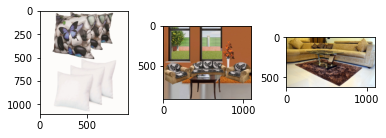

list_Baby


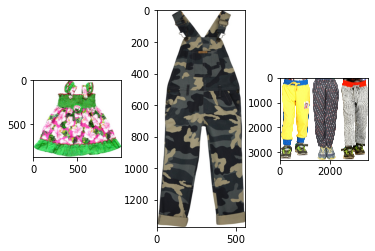

list_Watches


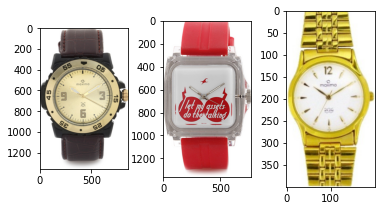

list_Decor


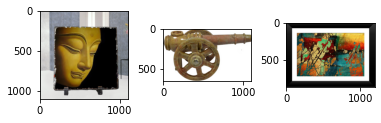

list_Kitchen


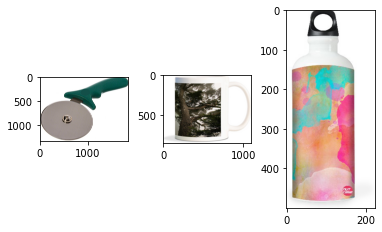

list_Beauty


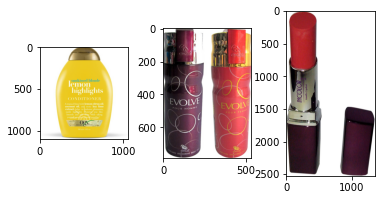

list_Computers


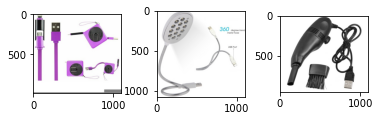

In [61]:
import random

list_labels = [list_Furnishing, list_Baby, list_Watches, list_Decor, list_Kitchen, list_Beauty, 
               list_Computers]
list_label_names = ['list_Furnishing', 'list_Baby', 'list_Watches', 'list_Decor', 'list_Kitchen', 'list_Beauty', 
               'list_Computers']

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

for name, list_lab in zip(list_label_names, list_labels) :
    random_pick = random.sample(list_lab, 3)
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + '/' + random_pick[i]
        image = imread(filename)
        plt.imshow(image)
        
    plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)
    plt.show()

## Détermination des descripteurs SIFT pour une image<a class="anchor" id="sub3"></a>

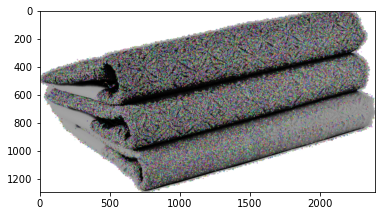

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [62]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path + '/' + list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram

#image8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


# 2. Pré-traitement des images via SIFT<a class="anchor" id="p1"></a>

## Créations des descripteurs de chaque image<a class="anchor" id="sub1-p1"></a>

In [63]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+ '/' + list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           253.76 secondes


C:\Users\Adnene\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


## Création des clusters de descripteurs<a class="anchor" id="sub2-p1"></a>

In [64]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

C:\Users\Adnene\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             5.42 secondes


## Création des features des images<a class="anchor" id="sub3-p1"></a>

In [65]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            38.54 secondes


## Réductions de dimension<a class="anchor" id="sub4-p1"></a>

### Réduction de dimension ACP

In [66]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 498)


### Réduction de dimension T-SNE

In [67]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = image_data['label']
print(df_tsne.shape)


C:\Users\Adnene\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


In [68]:
df_tsne

,tsne1,tsne2,class
0,-17.937866,-9.367360,Home Furnishing
1,-18.443800,-3.301381,Baby Care
2,-14.981713,9.780105,Baby Care
3,-1.201382,1.534037,Home Furnishing
4,-17.517508,-3.522213,Home Furnishing
...,...,...,...
1045,7.617875,-22.090456,Baby Care
1046,-11.817258,18.496054,Baby Care
1047,9.519198,-25.967216,Baby Care
1048,17.452547,23.759592,Baby Care


# 3. Analyse des résultats obtenues<a class="anchor" id="p3"></a>

## Visualisation : affichage T-SNE selon catégories d'images<a class="anchor" id="sub1-p3"></a>


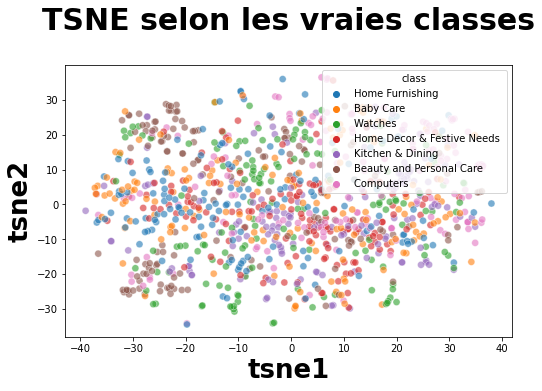

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

plt.show()


## Mesures : similarité entre catégories et clusters<a class="anchor" id="sub2-p3"></a>

###  Création de clusters à partir du T-SNE

In [70]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

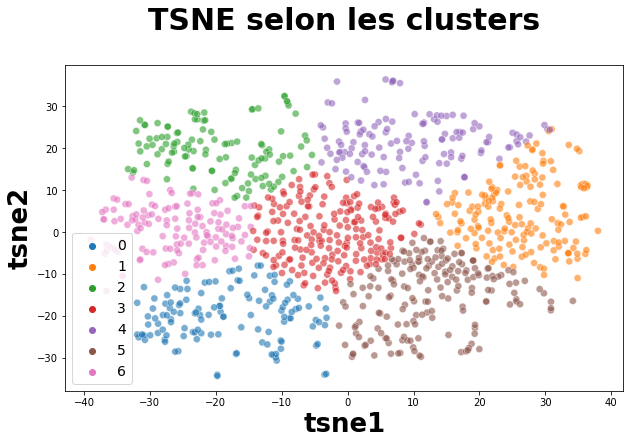

ARI :  0.0485283856856918


In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = image_data["enc_label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

* Le score ARI est trés faible

### Analyse par classes: matrice de confusion

In [72]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    130
1    164
2    115
3    197
4    132
5    183
6    129
Name: class, dtype: int64

In [73]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 5 20 14 26 19 31 35]
 [40 11 45 16 17 17  4]
 [10 43  9 19 44 19  6]
 [ 7 17  8 43  5 44 26]
 [17  8 13 27 19 18 48]
 [15 42  6 38 11 30  8]
 [36 23 20 28 17 24  2]]


In [74]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 2, 1, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 2, 1, 0]
[[35 31 19 26 14 20  5]
 [ 4 17 17 16 45 11 40]
 [ 6 19 44 19  9 43 10]
 [26 44  5 43  8 17  7]
 [48 18 19 27 13  8 17]
 [ 8 30 11 38  6 42 15]
 [ 2 24 17 28 20 23 36]]

              precision    recall  f1-score   support

           0       0.27      0.23      0.25       150
           1       0.09      0.11      0.10       150
           2       0.33      0.29      0.31       150
           3       0.22      0.29      0.25       150
           4       0.11      0.09      0.10       150
           5       0.26      0.28      0.27       150
           6       0.28      0.24      0.26       150

    accuracy                           0.22      1050
   macro avg       0.22      0.22      0.22      1050
weighted avg       0.22      0.22      0.22      1050



<AxesSubplot:>

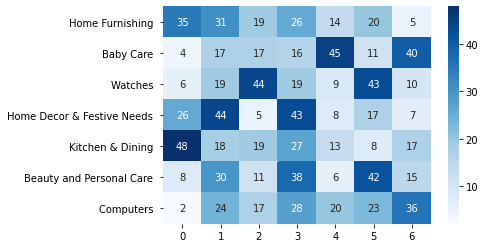

In [75]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in l_cat],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")